# Data Science Challenge

In [2]:
# To install packages that are not installed by default, uncomment the last two lines of this cell 
# and replace <package list> with a list of packages to import.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [40]:
# Libraries
import pandas as pd
import numpy as np

import datetime, warnings, scipy

pd.set_option("display.max_columns", 101)

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline\
#sns.set_style('darkgrid')

UsageError: unrecognized arguments: #sns.set_style('darkgrid')


## Data Description

Column | Description
:---|:---
`id` | Identification number for the flight.
`dep_stn` | Departure point.
`arr_stn` | Arrival point.
`ac_code` | Aircraft Code. 
`dep_date` | Scheduled departure date.	
`arr_date` | Scheduled arrival date.
`weather` | Observed weather conditions at departure.
`hobbs_meter` | The time in hours that an aircraft has been in use.
`year_man` | Year of manufacturer for the aircraft.
`dep_country` | Departure country.
`arr_country` | Destination country.
`delay` | Number of minutes a flight was delayed.

## Data Wrangling & Visualization

In [4]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [206]:
data.head(5)

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country,delay
0,TU 0930,TUN,MRS,TU 32AIMD,2016-01-01 07:55:00,2016-01-01 09.30.00,sunny,4390,2004-08,Tunisia,France,18.0
1,TU 0526,TUN,DUS,TU 736IOQ,2016-01-01 08:20:00,2016-01-01 11.05.00,rainy,5882,2010-01,Tunisia,Germany,39.0
2,TU 0718,TUN,ORY,TU 320IMU,2016-01-01 10:05:00,2016-01-01 12.25.00,foggy,6117,2011-03,Tunisia,France,14.0
3,TU 0997,NCE,TUN,TU 320IMT,2016-01-01 10:15:00,2016-01-01 11.50.00,sunny,8941,2010-01,France,Tunisia,25.0
4,TU 0700,TUN,GVA,TU 320IMV,2016-01-01 12:40:00,2016-01-01 14.35.00,stormy,4301,2004-08,Tunisia,Switzerland,21.0


In [7]:
#Explore columns
data.columns

Index(['id', 'dep_stn', 'arr_stn', 'ac_code', 'dep_date', 'arr_date',
       'weather', 'hobbs_meter', 'year_man', 'dep_country', 'arr_country',
       'delay'],
      dtype='object')

In [8]:
#Description
data.describe()

,hobbs_meter,delay
count,5000.000000,5000.000000
mean,6017.559600,21.016600
std,1433.121879,12.324378
min,3464.000000,1.000000
25%,4516.000000,10.000000
50%,6303.000000,19.000000
75%,6909.000000,30.000000
max,9200.000000,49.000000


In [6]:
#import test data
data_test=pd.read_csv('test.csv')

data_test = pd.DataFrame(data_test) #test data not has response

In [7]:
# Concate training set and testing set (if there is one)
frames=[data,data_test]
df=pd.concat(frames, 
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    copy=True,
) #union by row, attach below

In [8]:
data.shape

(5000, 12)

In [9]:
data_test.shape

(3000, 11)

In [10]:
df.shape

(8000, 12)

In [13]:
#create an indicator to imply train/test data
df['train']=np.concatenate(([1]*data.shape[0], [0]*data_test.shape[0]),axis=0)

In [14]:
#look at basic infor
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8000 non-null   object 
 1   dep_stn      8000 non-null   object 
 2   arr_stn      8000 non-null   object 
 3   ac_code      8000 non-null   object 
 4   dep_date     8000 non-null   object 
 5   arr_date     8000 non-null   object 
 6   weather      8000 non-null   object 
 7   hobbs_meter  8000 non-null   int64  
 8   year_man     8000 non-null   object 
 9   dep_country  8000 non-null   object 
 10  arr_country  8000 non-null   object 
 11  delay        5000 non-null   float64
 12  train        8000 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 875.0+ KB


Since there is no missing, so we will not deal with missing in feature engineering

In [15]:
df.columns.values

array(['id', 'dep_stn', 'arr_stn', 'ac_code', 'dep_date', 'arr_date',
       'weather', 'hobbs_meter', 'year_man', 'dep_country', 'arr_country',
       'delay', 'train'], dtype=object)

# Feature Engineering

## Look at categorical features

In [22]:
#Only look at training data
df1=df.loc[df['train']==1]

In [144]:
## Look at categorical features
top20_dep_stn=df1.groupby('dep_stn').size().sort_values(ascending=False).head(20).index
df1.groupby('dep_stn').size().sort_values(ascending=False).head(20).sum()

top 20 departures account for 4240 in the 5000. We will use one-hot to categorize them. THe others~800  can be explained whtn all the one hot are 0.

In [36]:
df1.groupby('id').size().sort_values(ascending=False)

id
TU 0744     90
TU 0745     88
TU 0635     81
TU 0722     81
TU 0724     81
            ..
TU 5072      1
TU 5092      1
TU 5504      1
TU 5505      1
TU 2870      1
Length: 422, dtype: int64

Since most of the airplanes are TU, we create a new indicator to show whether the airline is TU or not.

In [110]:
#create TU column in df
df['TU']=df['id'].str.contains('TU', case=False)
df1['TU']=df1['id'].str.contains('TU', case=False)

/tmp/ipykernel_133/3417487494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TU']=df1['id'].str.contains('TU', case=False)


In [39]:
df['TU'].sum()

7827

## Deal with Time

In [43]:
df1['dep_date'].max()

'2017-11-08 11:15:00'

In [54]:
df['DAY'] = pd.DatetimeIndex(df['dep_date']).day
df['MONTH'] = pd.DatetimeIndex(df['dep_date']).month
df['DayofWeek'] = pd.DatetimeIndex(df['dep_date']).dayofweek
df['Hour'] = pd.DatetimeIndex(df['dep_date']).hour

In [129]:
#check holiday
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start=df['dep_date'].min(), end=df['dep_date'].max())
#df['Holiday'] = pd.to_datetime(df['dep_date']).dt.date.isin(holidays)

/opt/conda/lib/python3.9/site-packages/pandas/core/algorithms.py:521: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return f(comps, values)


In [130]:
pd.to_datetime(df['dep_date']).dt.date.isin(holidays).sum()

/opt/conda/lib/python3.9/site-packages/pandas/core/algorithms.py:521: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return f(comps, values)


7

In [ ]:
US holidya make no senses here

In [64]:
df['arr_date'] = df['arr_date'].str.replace('.',':')
df['Diff_min']=(pd.to_datetime(df['arr_date'])-pd.to_datetime(df['dep_date'])).dt.total_seconds().div(60).astype(int)

/tmp/ipykernel_133/322865864.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['arr_date'] = df['arr_date'].str.replace('.',':')


In [68]:
df.head(2)

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country,delay,train,TU,DAY,MONTH,Holiday,DayofWeek,Hour,Diff_min
0,TU 0930,TUN,MRS,TU 32AIMD,2016-01-01 07:55:00,2016-01-01 09:30:00,sunny,4390,2004-08,Tunisia,France,18.0,1,True,1,1,False,4,7,95
1,TU 0526,TUN,DUS,TU 736IOQ,2016-01-01 08:20:00,2016-01-01 11:05:00,rainy,5882,2010-01,Tunisia,Germany,39.0,1,True,1,1,False,4,8,165


In [79]:
df['Domestic']=(df['dep_country']==df['arr_country']) #there is nearly no domestic airlines

# Visualization

In [125]:
df1=df[df['train']==1].copy()

## Average Delay time by dep_stn

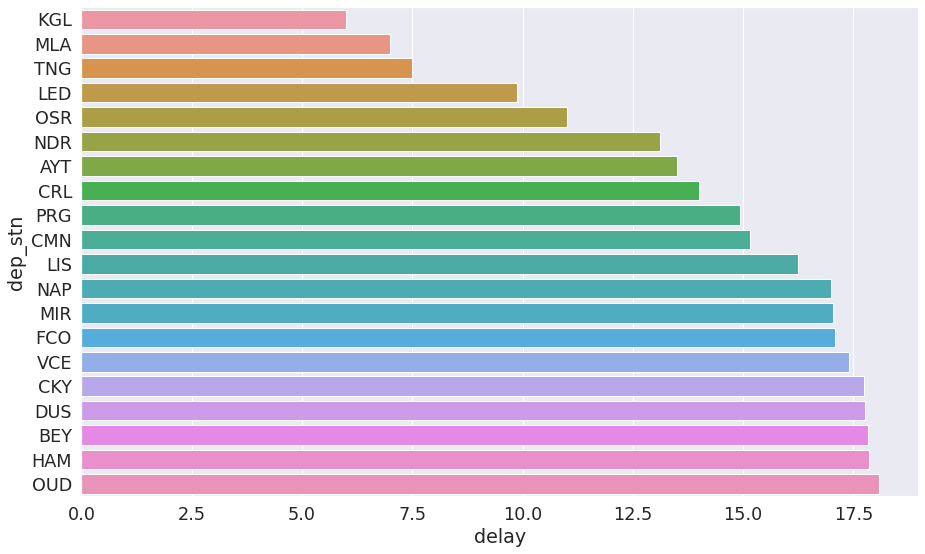

In [221]:
col='dep_stn'
test_3 = df1[[col, 'delay']]
test_3 = test_3.groupby([col]).mean().reset_index()
test_3 = test_3.sort_values(['delay']).reset_index(drop=True)
#test_3.head(18)

fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='delay', y=col, data=test_3.head(20))
plt.show()

## Average Delay time by weather

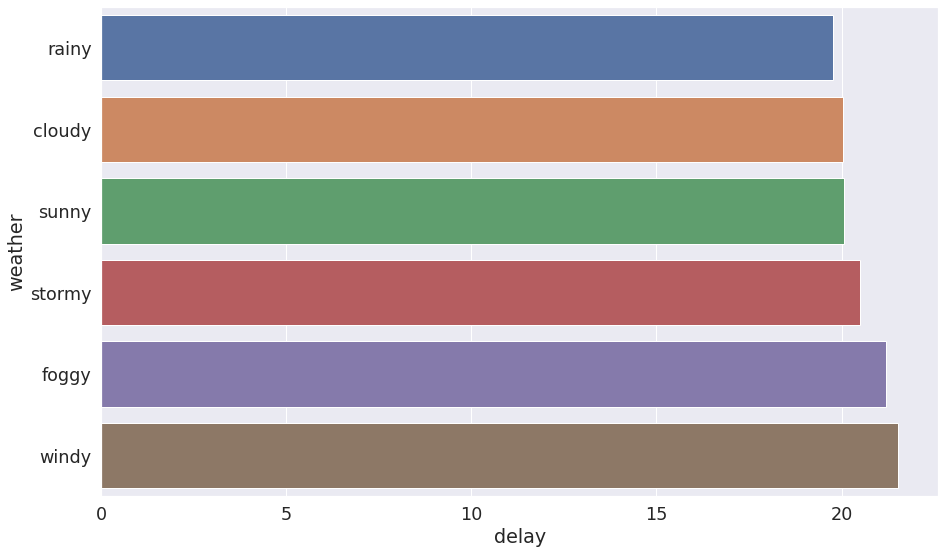

In [222]:
## Average Delay time by weather
col='weather'
test_3 = df1[[col, 'delay']]
test_3 = test_3.groupby([col]).mean().reset_index()
test_3 = test_3.sort_values(['delay']).reset_index(drop=True)
#test_3.head(18)

fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='delay', y=col, data=test_3.head(20))
plt.show()

## Average Delay time by dep_country

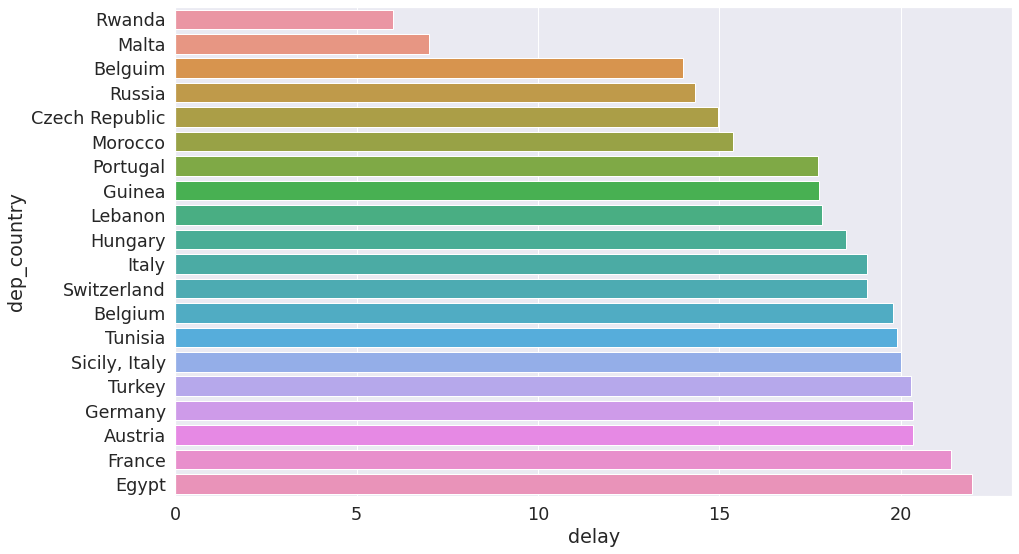

In [223]:
col='dep_country'
test_3 = df1[[col, 'delay']]
test_3 = test_3.groupby([col]).mean().reset_index()
test_3 = test_3.sort_values(['delay']).reset_index(drop=True)
#test_3.head(18)

fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='delay', y=col, data=test_3.head(20))
plt.show()

## Average Delay time by MONTH

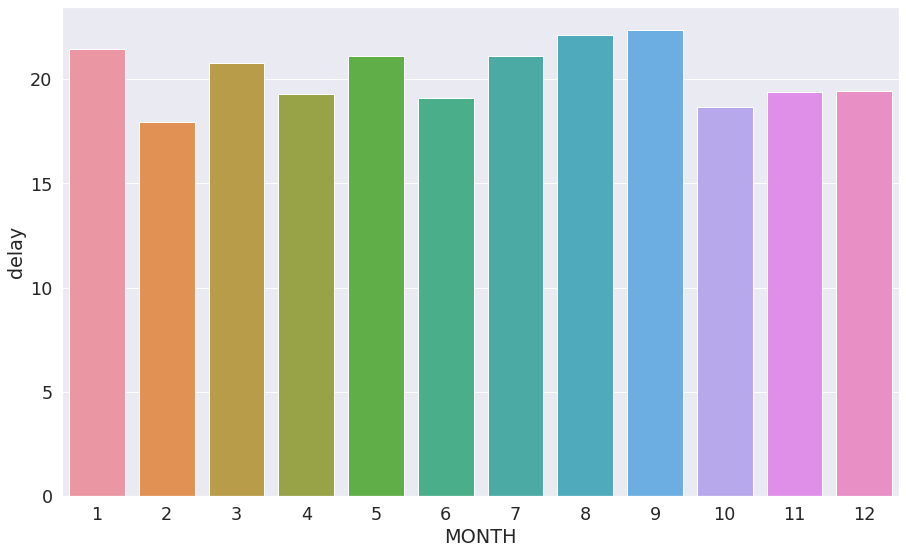

In [224]:

col='MONTH'
test_3 = df1[[col, 'delay']]
test_3 = test_3.groupby([col]).mean().reset_index()
test_3 = test_3.sort_values(['delay']).reset_index(drop=True)
#test_3.head(18)

fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(y='delay', x=col, data=test_3.head(20))
plt.show()

## Average Delay time by DayofWeek

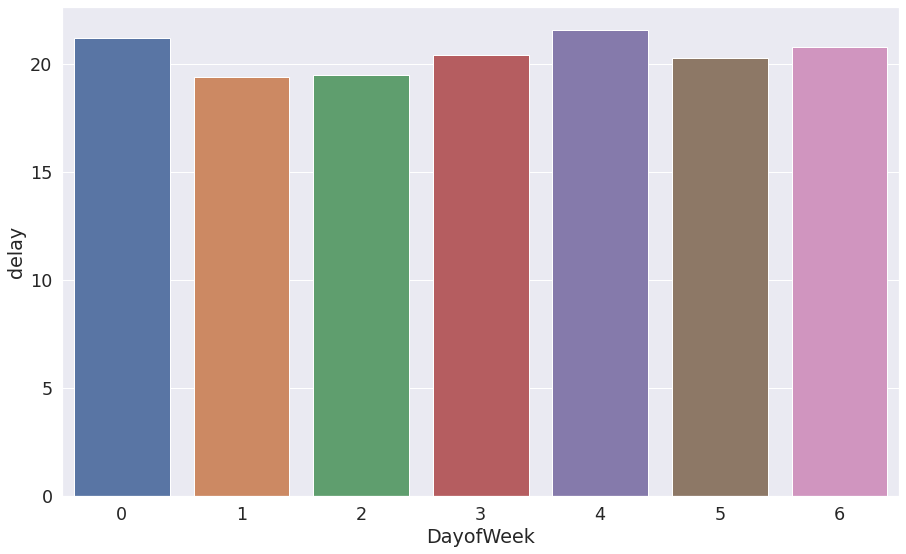

In [131]:

col='DayofWeek'
test_3 = df1[[col, 'delay']]
test_3 = test_3.groupby([col]).mean().reset_index()
test_3 = test_3.sort_values(['delay']).reset_index(drop=True)
#test_3.head(18)

fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(y='delay', x=col, data=test_3)
#ax.set_title('AVERAGE ARRIVAL DELAY BY AIRLINE (mins)', fontsize=18) #by col
#ax.set_xlabel('AVERAGE DELAY BY AIRLINE (min)', fontsize=14)
plt.show()

## Average Delay time by Hour

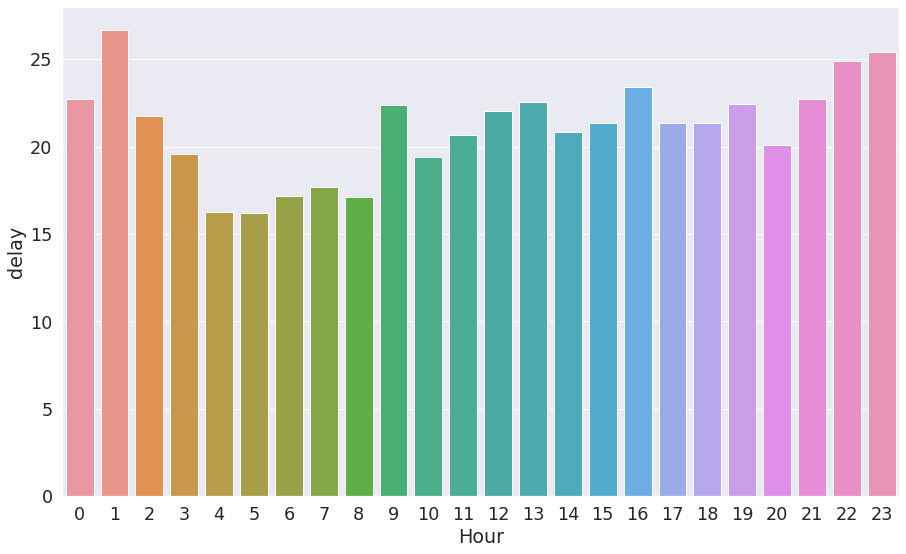

In [132]:
col='Hour'
test_3 = df1[[col, 'delay']]
test_3 = test_3.groupby([col]).mean().reset_index()
test_3 = test_3.sort_values(['delay']).reset_index(drop=True)
#test_3.head(18)

fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(y='delay', x=col, data=test_3)
#ax.set_title('AVERAGE ARRIVAL DELAY BY AIRLINE (mins)', fontsize=18) #by col
#ax.set_xlabel('AVERAGE DELAY BY AIRLINE (min)', fontsize=14)
plt.show()

there is a pattern in hours

## Average Delay time by Domestic

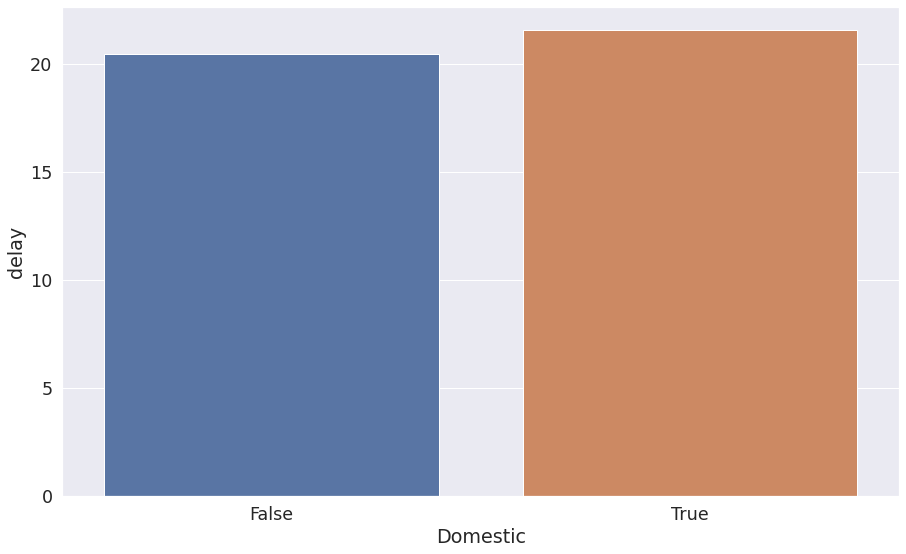

In [147]:
col='Domestic'
test_3 = df1[[col, 'delay']]
test_3 = test_3.groupby([col]).mean().reset_index()
test_3 = test_3.sort_values(['delay']).reset_index(drop=True)
#test_3.head(18)

fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(y='delay', x=col, data=test_3)
#ax.set_title('AVERAGE ARRIVAL DELAY BY AIRLINE (mins)', fontsize=18) #by col
#ax.set_xlabel('AVERAGE DELAY BY AIRLINE (min)', fontsize=14)
plt.show()

## Average Delay time by TU Airline

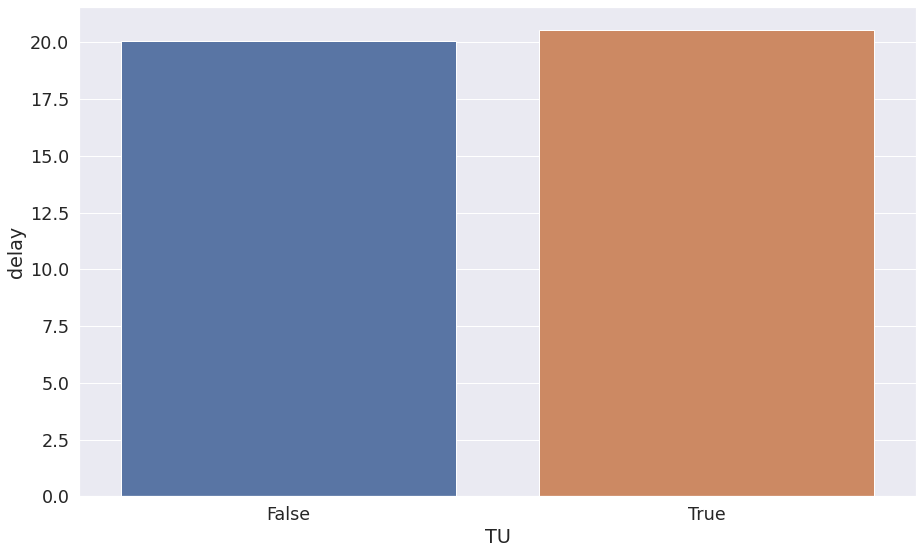

In [148]:
col='TU'
test_3 = df1[[col, 'delay']]
test_3 = test_3.groupby([col]).mean().reset_index()
test_3 = test_3.sort_values(['delay']).reset_index(drop=True)
#test_3.head(18)

fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(y='delay', x=col, data=test_3)
#ax.set_title('AVERAGE ARRIVAL DELAY BY AIRLINE (mins)', fontsize=18) #by col
#ax.set_xlabel('AVERAGE DELAY BY AIRLINE (min)', fontsize=14)
plt.show()

## Check Relationship between "Diff_min" and y="delay" (colinearity)

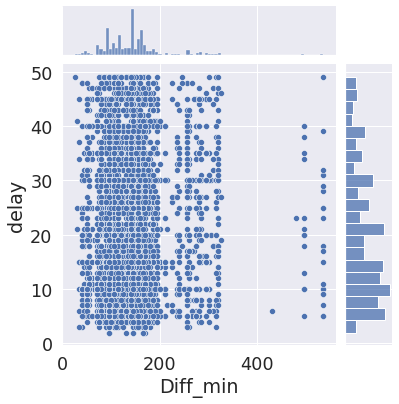

In [135]:
sns.jointplot(data=df1, x="Diff_min", y="delay") #independent 

## Check Relationship between "hobbs_meter" and y="delay" (colinearity)

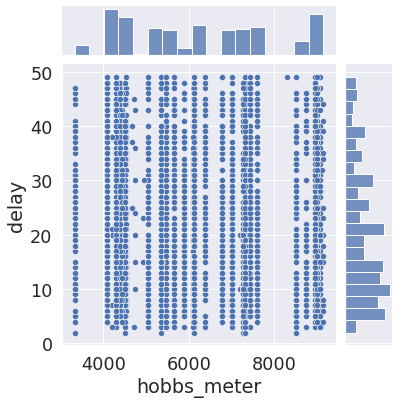

In [136]:
sns.jointplot(data=df1, x="hobbs_meter", y="delay") #independent 

# Model

## Data Preparation

In [145]:
df['dep_stn']=np.where(df['dep_stn'].isin(top20_dep_stn), df['dep_stn'], 'Others')

### create dummy

In [149]:

cate_features = ['dep_stn','weather','TU','MONTH','DayofWeek', 'Domestic'] #include categorical y
df_onehot = pd.get_dummies(df[cate_features])
df_onehot.head(3)

,TU,MONTH,DayofWeek,Domestic,dep_stn_ALG,dep_stn_BCN,dep_stn_BRU,dep_stn_CMN,dep_stn_DJE,dep_stn_DUS,dep_stn_FCO,dep_stn_FRA,dep_stn_GVA,dep_stn_IST,dep_stn_JED,dep_stn_LYS,dep_stn_MIR,dep_stn_MRS,dep_stn_MUC,dep_stn_MXP,dep_stn_NCE,dep_stn_ORY,dep_stn_Others,dep_stn_TLS,dep_stn_TUN,weather_cloudy,weather_foggy,weather_rainy,weather_stormy,weather_sunny,weather_windy
0,True,1,4,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,True,1,4,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,True,1,4,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


### Scale Numeric Variables

In [150]:

num_features=['hobbs_meter', 'Hour','Diff_min'] #include numerical y

In [151]:
from sklearn import preprocessing
#only standardize x, not y
#scale before split traning,validation,testing
scaler = preprocessing.StandardScaler().fit(df[num_features])
x_scaled = scaler.transform(df[num_features])
x_scaled[0]

array([-1.08081053, -1.02776173, -0.79146788])

In [152]:
x_scaled=pd.DataFrame(x_scaled, columns=[num_features])

In [154]:
x_scaled.head(2)

,hobbs_meter,Hour,Diff_min
0,-1.080811,-1.027762,-0.791468
1,-0.188057,-0.808067,0.356686


In [161]:
df_final_x =df_onehot.merge( x_scaled,left_index=True,right_index=True)

In [165]:
df_final_x.shape

(8000, 34)

In [163]:
response='delay'
df_final_y = df[response]
df_final_y

0       18.0
1       39.0
2       14.0
3       25.0
4       21.0
        ... 
2995     NaN
2996     NaN
2997     NaN
2998     NaN
2999     NaN
Name: delay, Length: 8000, dtype: float64

In [166]:
train_length=sum(df['train']==1)
train_length

5000

In [168]:
#If has test dataset without y, then after all the data cleaning, data engineering and create dummy variables, excute the following codes
train_data_x=df_final_x.iloc[0:train_length,:]
train_data_y=df_final_y.iloc[0:train_length]
test_data_x=df_final_x.iloc[train_length:,]
test_data_y=df_final_y.iloc[train_length:]

### Split the dataset into training set, validation set and test set:

In [169]:
from sklearn.model_selection import train_test_split

x_train, x_dev, y_train, y_dev = train_test_split(train_data_x, train_data_y, test_size=0.25)

In [170]:
(x_train.shape, x_dev.shape, test_data_x.shape, y_train.shape, y_dev.shape, test_data_y.shape)

((3750, 34), (1250, 34), (3000, 34), (3750,), (1250,), (3000,))

## XgBoost

In [171]:
%matplotlib inline
import sklearn
import seaborn as sns
#import lightgbm as lgb
import xgboost as xgb
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [172]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#from sklearn.ensemble import BaggingClassifier
import xgboost as xgb

In [173]:
dtrain = xgb.DMatrix(x_train, label=y_train)
ddev= xgb.DMatrix(x_dev,y_dev)

In [202]:
param_grid = {
    "learning_rate": [0.1, 0.05],
    'max_depth': [2, 4,6],
    'min_child_weight': [10],
    'subsample': [0.8],
    'n_estimators': [100,200],
    'lambda':[1]
}

In [203]:
model= xgb.XGBRegressor(objective='reg:squarederror') #'reg:squarederror'
grid_clf = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_percentage_error', cv=5,n_jobs=-1)
grid_clf.fit(x_train, y_train)

best_parameters = grid_clf.best_params_

In [204]:
grid_clf.best_score_ #this is negative MAPE

-0.8466027230737401

In [209]:
best_parameters

{'lambda': 1,
 'learning_rate': 0.05,
 'max_depth': 2,
 'min_child_weight': 10,
 'n_estimators': 100,
 'subsample': 0.8}

In [205]:
test_preds = grid_clf.predict(test_data_x)
test_preds

array([19.622553, 22.390865, 20.205233, ..., 20.418886, 19.140493,
       20.533766], dtype=float32)

In [254]:
## Deal with feature Importance
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()

model.fit(x_train, y_train, objective='reg:squarederror', eval_metric='mape')
# feature importance
print(model.feature_importances_)

TypeError: fit() got an unexpected keyword argument 'objective'

In [ ]:
plot_importance(model)
pyplot.show()

## Neutrla Network 

In [181]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D , SeparableConv2D, MaxPool2D, Flatten , Dropout , BatchNormalization
from keras import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow import keras

In [182]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('LOSS', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.show()

In [242]:
model_1 = Sequential()

model_1.add(Dense(30, activation='relu', input_shape=((len(df_onehot.iloc[0])+len(num_features)),)) )

model_1.add(tf.keras.layers.LeakyReLU(alpha=0.05)) #negative  slope coefficient.

model_1.add(Dense(10, activation='relu'))

model_1.add(Dense(1))

In [243]:
model_1.compile(loss=tf.keras.losses.MeanAbsolutePercentageError(), 
                optimizer='adam', 
                metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

In [244]:
train_data_x = np.asarray(train_data_x).astype('float32')
train_data_y = np.asarray(train_data_y).astype('float32')
test_data_x = np.asarray(test_data_x).astype('float32')

In [245]:
results1 = model_1.fit(train_data_x, train_data_y, epochs=20, batch_size=30, validation_split=0.1)

Epoch 1/20
150/150 [==============================] - 1s 3ms/step - loss: 64.4322 - mean_absolute_percentage_error: 64.4322 - val_loss: 54.8015 - val_mean_absolute_percentage_error: 54.8015
Epoch 2/20
150/150 [==============================] - 0s 2ms/step - loss: 55.5080 - mean_absolute_percentage_error: 55.5080 - val_loss: 52.5637 - val_mean_absolute_percentage_error: 52.5637
Epoch 3/20
150/150 [==============================] - 0s 3ms/step - loss: 54.6029 - mean_absolute_percentage_error: 54.6029 - val_loss: 53.1954 - val_mean_absolute_percentage_error: 53.1954
Epoch 4/20
150/150 [==============================] - 0s 2ms/step - loss: 54.2316 - mean_absolute_percentage_error: 54.2316 - val_loss: 51.9137 - val_mean_absolute_percentage_error: 51.9137
Epoch 5/20
150/150 [==============================] - 0s 2ms/step - loss: 54.0275 - mean_absolute_percentage_error: 54.0275 - val_loss: 51.7605 - val_mean_absolute_percentage_error: 51.7605
Epoch 6/20
150/150 [==============================

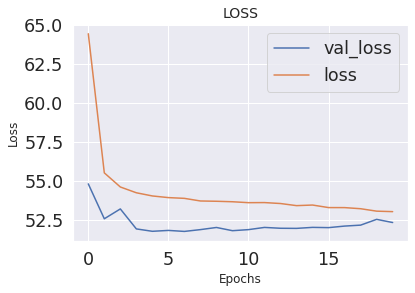

In [246]:
visualize_training_results(results1)

In [247]:
y_pred_m1 = model_1.predict(test_data_x)

In [248]:
y_pred_m1

array([[11.097003 ],
       [ 9.459083 ],
       [ 9.445899 ],
       ...,
       [11.312411 ],
       [ 9.59156  ],
       [ 7.6024117]], dtype=float32)

In [249]:
result2=pd.DataFrame()
result2['id']=df['id'].iloc[5000:]
result2['delay']=y_pred_m1

In [250]:
result2.to_csv('submissions.csv')

##  Modeling, Machine Learning

Build a regression model to predict how many minutes a flight will be delayed. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model's performance will be evaluated on mean absolute percent error.**
- **Read the test.csv file and prepare features for testing.**

In [9]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country
0,TU 0848,BEY,TUN,TU 31BIMQ,2017-11-12 11:35:00,2017-11-12 15.10.00,cloudy,6399,2004-08,Lebanon,Tunisia
1,TU 0720,TUN,ORY,TU 320IMT,2017-11-12 13:00:00,2017-11-12 15.20.00,foggy,8338,2009-04,Tunisia,France - Orly
2,TU 0998,TUN,NCE,TU 32AIMP,2017-11-12 14:15:00,2017-11-12 15.45.00,cloudy,6847,2010-01,Tunisia,France
3,TU 0722,TUN,ORY,TU 32AIMG,2017-11-12 15:10:00,2017-11-12 17.30.00,sunny,6909,2008-12,Tunisia,France - Orly
4,TU 0613,DKR,BKO,TU 320IMV,2017-11-12 22:20:00,2017-11-12 23.55.00,stormy,4243,2004-08,Senegal,Mali



**Describe the most important features of the model to management.**

> #### Task:
- **Visualize the top 10 features and their feature importance.**


> #### Task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict how many minutes a flight will be delayed. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **delay**

In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)